In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tweet             7 non-null      object 
 1   Sentiment_Score   7 non-null      float64
 2   Date              7 non-null      object 
 3   Stock Movement    7 non-null      int64  
 4   Open              7 non-null      float64
 5   High              7 non-null      float64
 6   Low               7 non-null      float64
 7   Close             7 non-null      float64
 8   Volume            7 non-null      float64
 9   Close_Change      7 non-null      float64
 10  Price_Volatility  7 non-null      float64
 11  Sentiment_MA3     7 non-null      float64
 12  Tweet_Count       7 non-null      int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 860.0+ bytes
None

📈 Summary Statistics:
       Sentiment_Score  Stock Movement        Open        High         Low  \
count

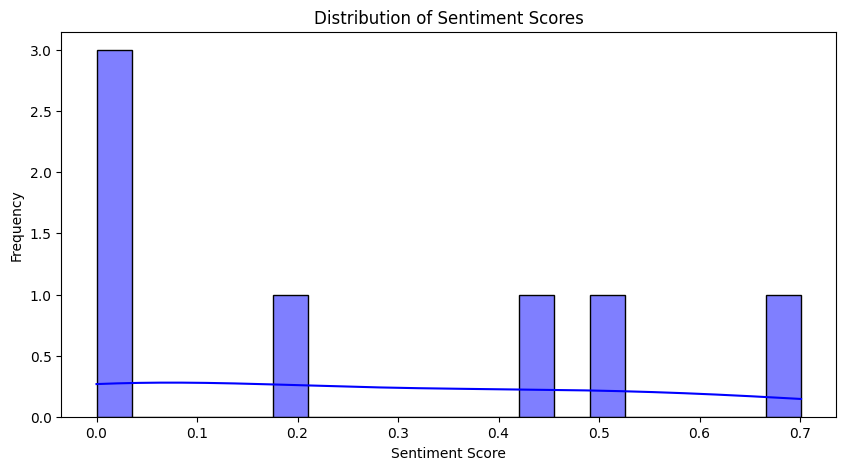

In [3]:
df = pd.read_csv("../data/final_stock_sentiment.csv")

print("📊 Dataset Info:")
print(df.info())

print("\n📈 Summary Statistics:")
print(df.describe())


print("\n Missing Values:")
print(df.isnull().sum())


plt.figure(figsize=(10, 5))
sns.histplot(df['Sentiment_Score'], bins=20, kde=True, color='blue')
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()



Time-Series Analysis:


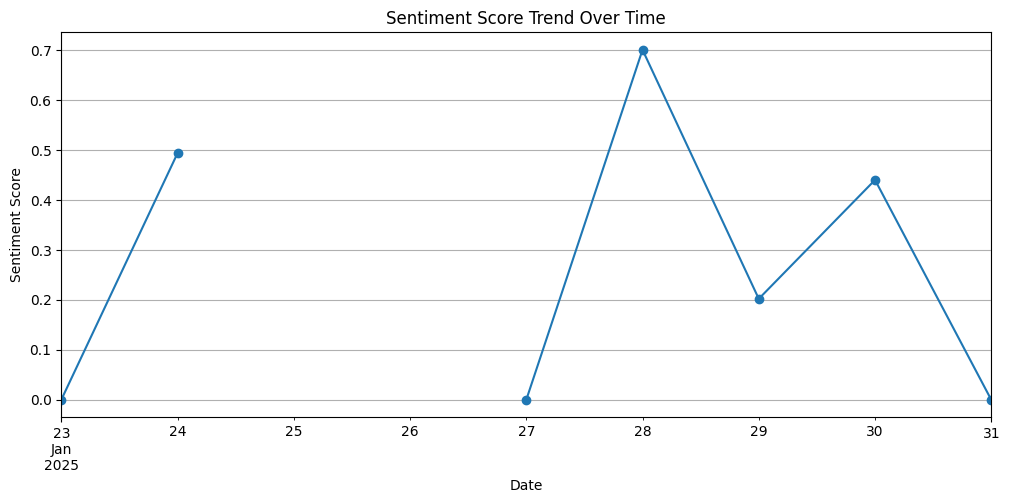

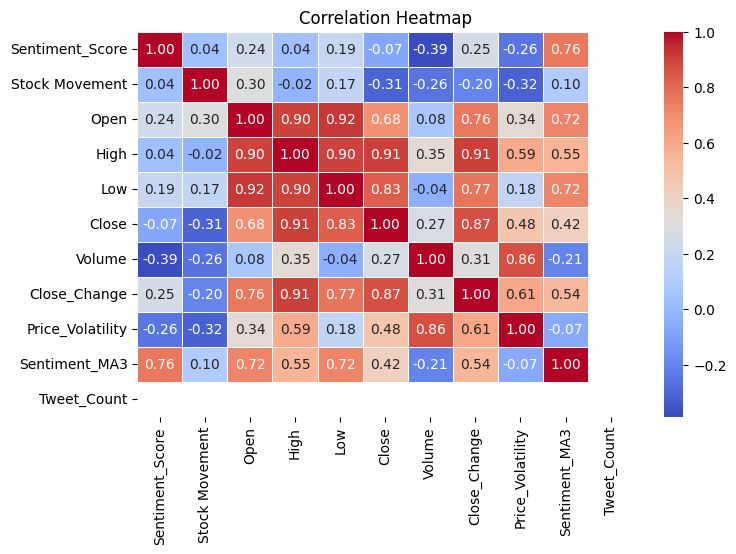

In [4]:
if 'Date' in df.columns:
    print("\nTime-Series Analysis:")
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    df["Sentiment_Score"] = pd.to_numeric(df["Sentiment_Score"], errors='coerce')

    plt.figure(figsize=(12, 5))
    df.resample('D')["Sentiment_Score"].mean().plot(title="Sentiment Score Trend Over Time", marker='o', linestyle='-')
    plt.xlabel("Date")
    plt.ylabel("Sentiment Score")
    plt.grid()
    plt.show()
else:
    print("No `Date` column found. Skipping time-series analysis.")

numeric_cols = df.select_dtypes(include=['number']).columns

if len(numeric_cols) > 1:
    plt.figure(figsize=(8, 5))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Not enough numeric columns for a correlation heatmap.")